In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
import seaborn as sn
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets

In [ ]:
(xtrain,ytrain),(xtest,ytest)=datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
xtrain.shape

(50000, 32, 32, 3)

In [ ]:
print(ytrain[:10])

[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]


In [ ]:
ytrain=ytrain.reshape(-1,)
ytrain[:2]


array([6, 9], dtype=uint8)

In [ ]:
col=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
def plotfunc(x,y,index):
  pl.figure(figsize=(15,2))
  pl.imshow(x[index])
  pl.title(col[y[index]])


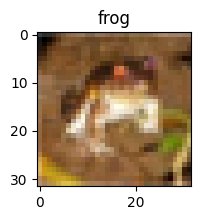

In [ ]:
plotfunc(xtrain,ytrain,0)

In [ ]:
xtrain=xtrain/255
xtest=xtest/255

In [ ]:
model=keras.Sequential([
    keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=(32,32,3)),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu"),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Dropout(0.5),

    keras.layers.Flatten(),
    keras.layers.Dense(50,activation="relu"),
    keras.layers.Dense(10,activation="softmax")
])

model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model.fit(xtrain,ytrain,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 73s 46ms/step - loss: 1.5831 - accuracy: 0.4253
Epoch 2/5
1563/1563 [==============================] - 68s 44ms/step - loss: 1.2533 - accuracy: 0.5571
Epoch 3/5
1563/1563 [==============================] - 71s 45ms/step - loss: 1.1395 - accuracy: 0.6013
Epoch 4/5
1563/1563 [==============================] - 67s 43ms/step - loss: 1.0777 - accuracy: 0.6227
Epoch 5/5
1563/1563 [==============================] - 66s 43ms/step - loss: 1.0303 - accuracy: 0.6381


In [ ]:
model.evaluate(xtest,ytest)

313/313 [==============================] - 5s 14ms/step - loss: 0.9409 - accuracy: 0.6719


[0.9408681392669678, 0.6718999743461609]

In [ ]:
ytest=ytest.reshape(-1,)

In [ ]:
ypred=model.predict(xtest)

313/313 [==============================] - 4s 13ms/step


In [ ]:
ypred=[np.argmax(i) for i in ypred]

In [ ]:
ypred

[8,
 8,
 8,
 8,
 6,
 6,
 1,
 6,
 3,
 1,
 0,
 9,
 5,
 7,
 9,
 8,
 5,
 3,
 8,
 6,
 7,
 0,
 0,
 9,
 4,
 4,
 4,
 0,
 9,
 6,
 6,
 5,
 4,
 3,
 9,
 3,
 7,
 1,
 9,
 5,
 0,
 6,
 5,
 6,
 0,
 9,
 3,
 9,
 7,
 6,
 9,
 8,
 6,
 6,
 8,
 8,
 7,
 3,
 5,
 3,
 7,
 5,
 6,
 0,
 6,
 2,
 1,
 0,
 3,
 7,
 0,
 6,
 8,
 8,
 0,
 2,
 2,
 3,
 3,
 8,
 8,
 1,
 1,
 7,
 2,
 7,
 2,
 8,
 9,
 9,
 0,
 4,
 8,
 6,
 4,
 6,
 6,
 0,
 0,
 3,
 5,
 7,
 6,
 3,
 1,
 1,
 8,
 6,
 7,
 7,
 4,
 0,
 2,
 2,
 9,
 3,
 0,
 4,
 6,
 5,
 8,
 7,
 1,
 2,
 8,
 2,
 8,
 3,
 6,
 2,
 4,
 1,
 8,
 9,
 1,
 5,
 9,
 7,
 4,
 8,
 4,
 5,
 6,
 5,
 8,
 4,
 6,
 6,
 5,
 3,
 8,
 1,
 6,
 0,
 0,
 6,
 2,
 9,
 3,
 4,
 2,
 1,
 6,
 6,
 8,
 4,
 8,
 4,
 9,
 4,
 9,
 9,
 8,
 8,
 9,
 9,
 6,
 7,
 3,
 0,
 0,
 5,
 6,
 3,
 5,
 8,
 6,
 3,
 6,
 8,
 6,
 8,
 0,
 1,
 7,
 4,
 8,
 3,
 3,
 8,
 3,
 0,
 8,
 7,
 1,
 3,
 8,
 5,
 7,
 9,
 3,
 1,
 3,
 9,
 0,
 0,
 4,
 9,
 0,
 7,
 7,
 7,
 9,
 5,
 4,
 9,
 4,
 2,
 3,
 6,
 5,
 1,
 5,
 8,
 8,
 0,
 4,
 7,
 3,
 3,
 1,
 1,
 8,
 9,
 0,
 6,
 1,
 8,
 2,
 0,


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
cl=classification_report(ytest,ypred)
cn=confusion_matrix(ytest,ypred)

In [ ]:
print(cl)

              precision    recall  f1-score   support

           0       0.74      0.70      0.72      1000
           1       0.89      0.69      0.77      1000
           2       0.57      0.55      0.56      1000
           3       0.45      0.55      0.50      1000
           4       0.58      0.68      0.63      1000
           5       0.61      0.54      0.57      1000
           6       0.79      0.72      0.75      1000
           7       0.81      0.65      0.72      1000
           8       0.73      0.83      0.78      1000
           9       0.70      0.82      0.76      1000

    accuracy                           0.67     10000
   macro avg       0.69      0.67      0.68     10000
weighted avg       0.69      0.67      0.68     10000



<Axes: >

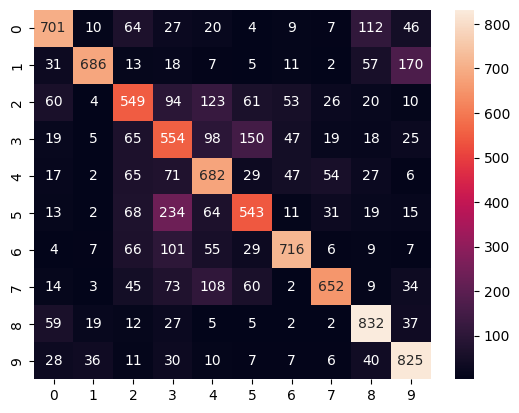

In [ ]:
sn.heatmap(cn,annot=True,fmt="d")